In [1]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
from numpy import *
import pandas as pd
#from matplotlib.pyplot import *
#matplotlib inline
from bokeh.plotting import *
import bokeh.io
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("/home/pavan/Inertial-Positioning-System/data_1.csv")
gyro_x = asanyarray(data.GyroX)
data = data.reset_index()

In [43]:
def kfilter(dt):
    kf = KalmanFilter(dim_x=2,dim_z=1)
    kf.F = array(([1,-dt],[0,1]))         #Transition Matrix
    kf.Q = array(([0.01,0],[0,0.01]))
    kf.B = 0
    kf.H = array([[1,0]])
    kf.R = 100
    kf.x = array(([0],[0]))
    kf.P = eye(2)*500
    return kf


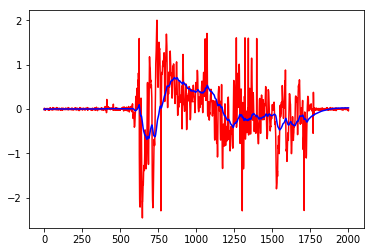

In [44]:
tracker = kfilter(0.006)
mu, cov, _, _ = tracker.batch_filter(gyro_x)
plt.plot(data.index,gyro_x,'r')
plt.plot(data.index,mu[:,0],'b')

In [19]:
tracker.P

array([[ 1.47229145, -0.99261125],
       [-0.99261125,  2.4720847 ]])

In [14]:
type(cov)

numpy.ndarray

In [37]:
data

,index,GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,0,-0.013466,-0.005542,0.015427,0.004106,-0.003747,0.989125
1,1,0.017069,-0.005542,0.007794,0.003862,-0.005212,1.001088
2,2,0.009435,0.009725,0.015427,0.016313,0.002845,1.001088
3,3,-0.005832,0.009725,0.000160,-0.001021,-0.004479,1.005971
4,4,0.009435,0.002092,0.000160,0.014360,0.000160,1.016225
5,5,-0.005832,0.009725,0.000160,0.001909,-0.010583,0.995961
6,6,0.001802,-0.005542,0.007794,-0.004195,0.002601,0.996205
7,7,-0.021099,0.009725,0.007794,-0.000044,0.002113,1.005238
8,8,-0.005832,-0.013176,0.000160,0.000688,-0.009850,1.002797
9,9,-0.021099,0.002092,0.007794,-0.000044,0.003089,0.996449
